In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from tqdm import tqdm 
import gc
import random
import lightgbm as lgbm
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
train=pd.read_csv('train_err_data.csv')
errcode_30=pd.DataFrame(train['errcode'].value_counts()[:30]).reset_index()
errcode_30.columns=['errcode','counts']
errcode_30

,errcode,counts
0,1,8906967
1,0,2599123
2,connection timeout,1835600
3,B-A8002,897863
4,80,334018
5,79,332422
6,14,263577
7,active,219238
8,2,166382
9,84,129876


In [5]:
test=pd.read_csv('test_err_data.csv')
errcode_test=pd.DataFrame(test['errcode'].value_counts()[:40]).reset_index()
errcode_test.columns=['errcode','counts']

errcode_test_train=pd.merge(errcode_test,errcode_30,on='errcode',how='right')
errcode_test_train

,errcode,counts_x,counts_y
0,1,8750154,8906967
1,0,2565532,2599123
2,connection timeout,1890632,1835600
3,B-A8002,855747,897863
4,80,326179,334018
5,79,324186,332422
6,14,316110,263577
7,active,225519,219238
8,2,155401,166382
9,84,140642,129876


### 밑에 그래프를 보면 29번 connectionterminated by local host 가 상당히 범위가 다름을 볼 수 있다.

In [8]:
 %matplotlib notebook 

<IPython.core.display.Javascript object>


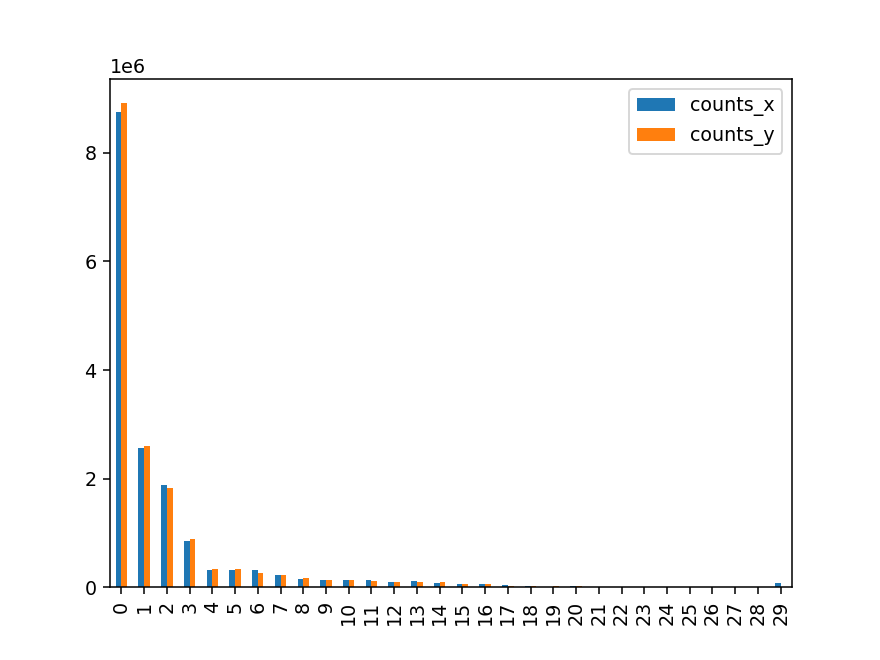

<AxesSubplot:>

In [10]:

errcode_test_train.plot.bar()

<IPython.core.display.Javascript object>


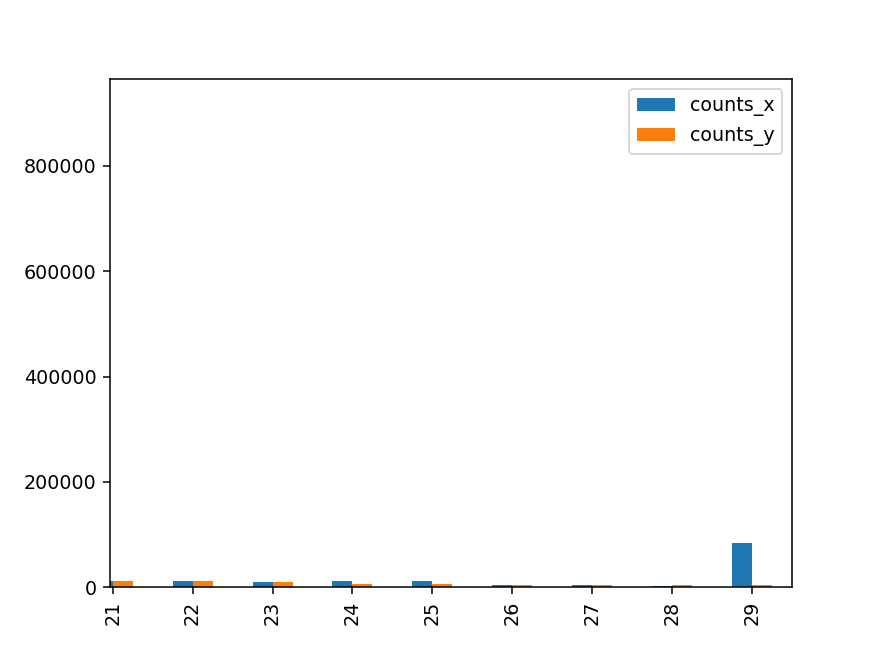

<AxesSubplot:>

In [11]:
errcode_test_train.plot.bar()